# Large Assignment 1

### Assignment Description

The aquifer test was performed next to the Black River, 2 km NorthEast of Poplar Bluff, Missouri (USA),
to assess the potential yield of a riverbank ltration system for water supply. A test well and ve observation
wells were installed at the site, as shown in Fig. 1 (scale is in feet). The geologic sections shown on Fig. 1
are presented in cross sections in Figs. 2 and 3. The boring logs indicate that the aquifer consists of sand and **gravel confined on top by a 12-m-thick clay layer and below by bedrock consisting of low-permeability material**. The aquifer has a fairly uniform thickness of 15 m across the well field. The test well and the observation well are screened **over the bottom 6 m of the aquifer,except for well 1, which screened over 9 m** The test well has a diameter of** 0.3 m**. The river lies on top of the aquifer and cuts partly through the confining clay layer. A 72-hour constant rate aquifer test was conducted with an average **pumping rate of 3145 cubic meters per day**. 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

Loading data from txt file

In [2]:
data_well1 = np.loadtxt('ow1m.txt')
data_well2 = np.loadtxt('ow2m.txt')
data_well3 = np.loadtxt('ow3m.txt')
data_well4 = np.loadtxt('ow4m.txt')
data_well5 = np.loadtxt('ow5m.txt')
data = [data_well1, data_well2, data_well3, data_well4, data_well5]


** The Assumptions: **

The model built based on the reference level of 0 m, hence, all the plotted head are refered to 0m at its starting point

### Question 1

**Determine the hydraulic conductivity and specific storage coefficient of the aquifer by using the measurements at one observation well at a time without taking into account the river. Create 5 graphs showing the data of each well and the best-fit line of the modeled head.**

Build a model with function

In [3]:
from scipy.optimize import fmin
def model(k, S, t, x, y):
    ml = ModelMaq(kaq= k , z= [91.2, 76.2], Saq = S, tmin=0.0001, tmax = 10)
    wl = Well(ml, xw=734197.1, yw = 4072815.9, rw = 0.3, tsandQ=[(0,3145),(4320/60/24,0)] )
    ml.solve(silent = True)
    return ml.head(x, y, t/60/24)

obj = lambda P,t,obs,x,y : ((model(P[0],P[1],t, x, y) - obs)**2).sum()

To find optimal hydraulic conductivity and storage coefficient with each observation well

In [5]:
type(time)

numpy.ndarray

The optimal conductivity and storage coefficient for well 1 is 85.3509236026 m/d and 0.00000


<IPython.core.display.Javascript object>


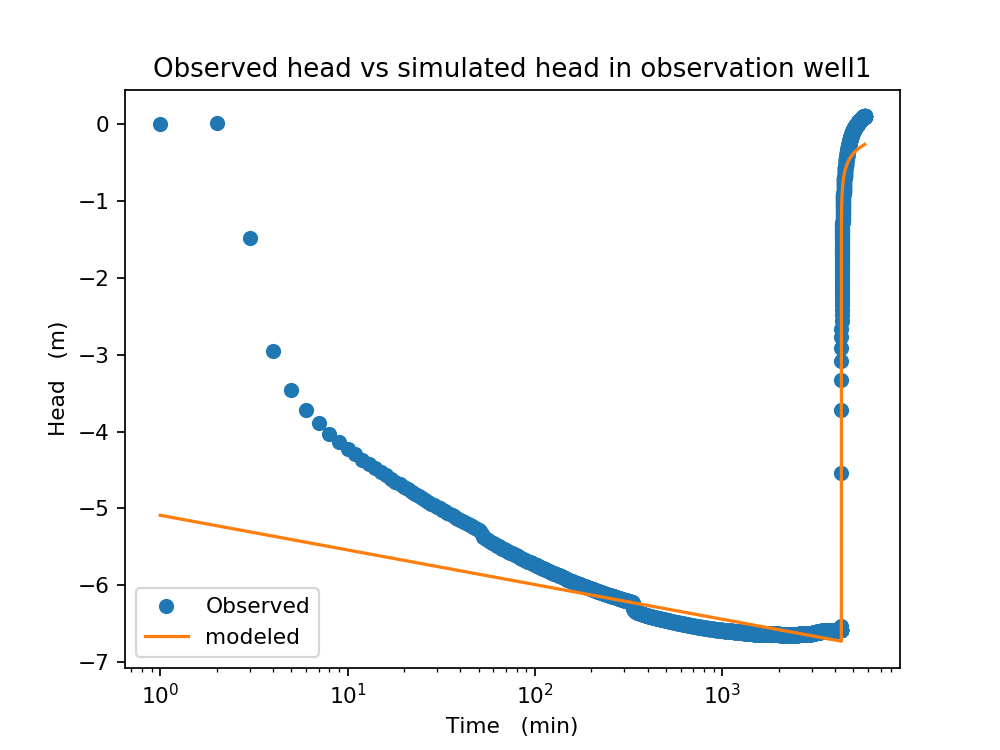

The optimal conductivity and storage coefficient for well 2 is 89.7354551036 m/d and 0.00000


<IPython.core.display.Javascript object>


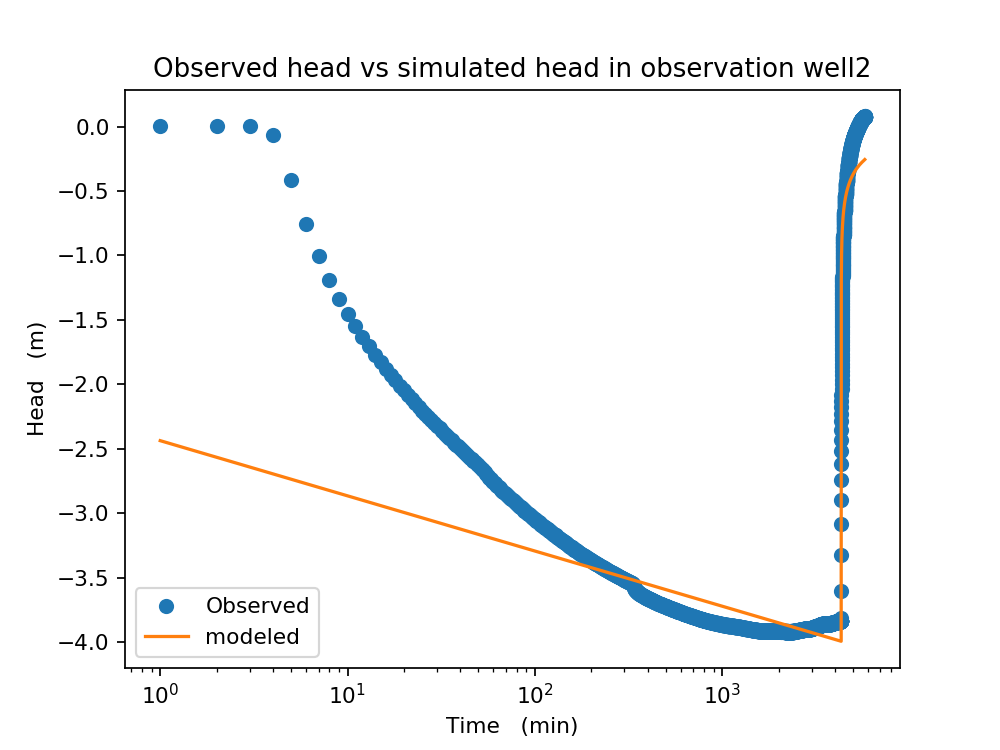

The optimal conductivity and storage coefficient for well 3 is 90.0491134744 m/d and 0.00000


<IPython.core.display.Javascript object>


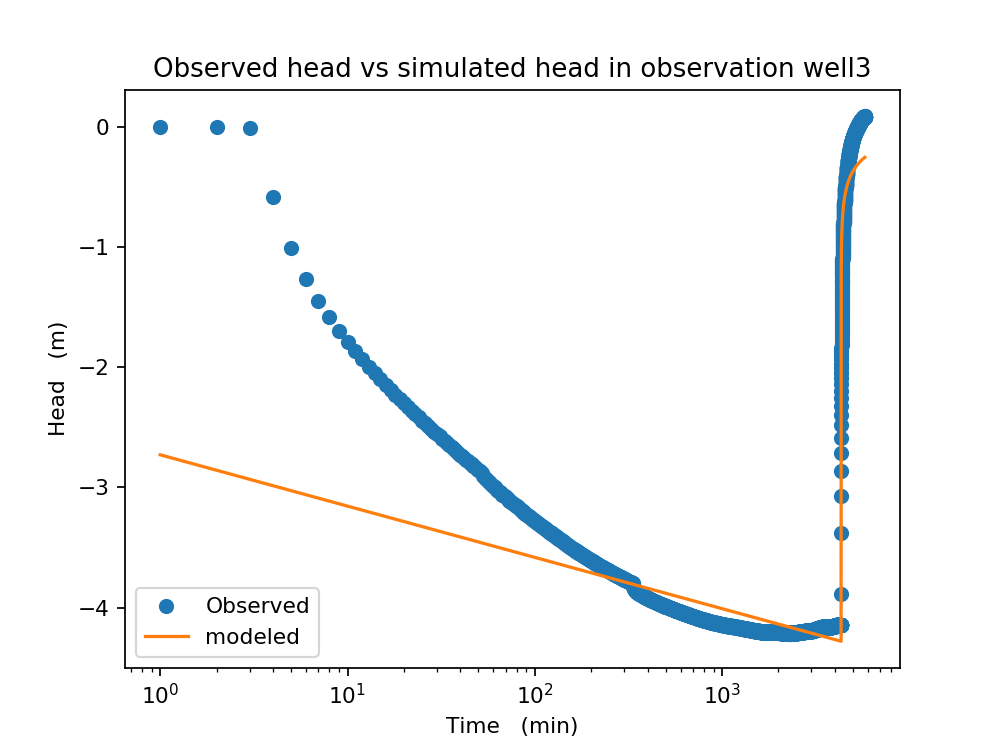

The optimal conductivity and storage coefficient for well 4 is 137.210834078 m/d and 0.00000


<IPython.core.display.Javascript object>


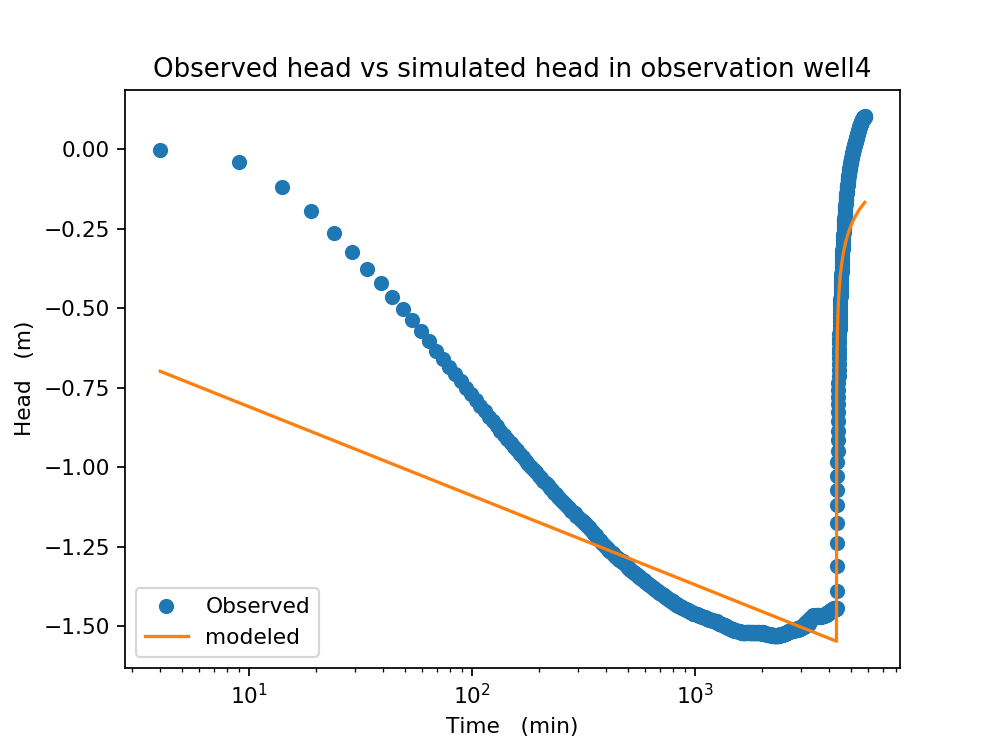

The optimal conductivity and storage coefficient for well 5 is 74.6647269266 m/d and 0.00000


<IPython.core.display.Javascript object>


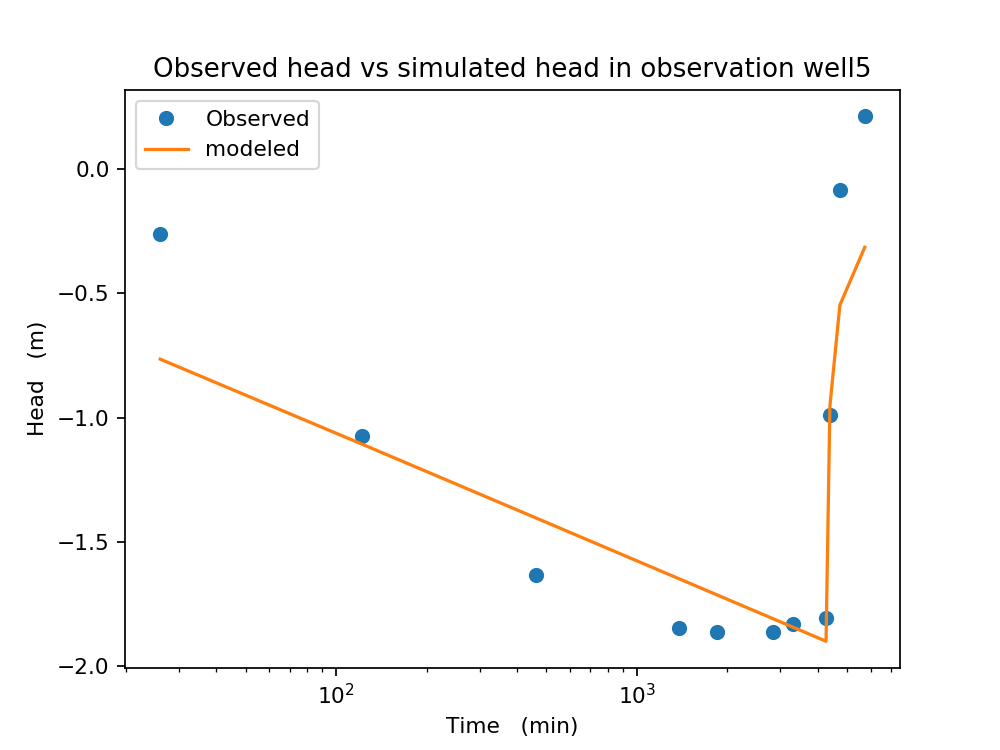

In [4]:
x1, y1 = 734189.4, 4072813.8
x2, y2 = 734215.0, 4072839.4
x3, y3 = 734227.8, 4072813.8
x4, y4 = 734394.9, 4072863.5
x5, y5 = 734155.9, 4072649.8
X = [x1,x2,x3,x4,x5]
Y = [y1,y2,y3,y4,y5]
K= []
S= []
for i in range(len(X)):
    time = data[i][:,0]
    obs = -data[i][:,1]
    ind = np.where(time>0)
    time = time[ind]
    obs = obs[ind]
    k,s = fmin(obj, x0=[10,0.001], args=(time, obs, X[i],Y[i]), xtol=1e-2, ftol=1e-2, maxiter=1e4, disp=False)
    print('The optimal conductivity and storage coefficient for well %s is %s m/d and %.5f'%(i+1,k,s))
    K.append(k)
    S.append(s)
    plt.figure(i)
    plt.semilogx(time, obs,'o', label='Observed')
    plt.semilogx(time, model(k,s,time,X[i],Y[i])[0], label ='modeled')
    plt.legend()
    plt.xlabel('Time   (min)')
    plt.ylabel('Head   (m)')
    plt.title('Observed head vs simulated head in observation well'+str(i+1))
    plt.show()

**Discussion**

The calibrated parameters are so ridiculous with each observation well that they are not able to replicate the nature.

### Question 2

**Determine the hydraulic conductivity and specific storage coefficient of the aquifer by using the measurements at all observation wells simutaneously without taking into account the river. Create one graph showing the data of each well and the best-fit line of the modeled head. A semi-log plot may be the best. Report the root mean square error.**

In [5]:
def minimize(P,data,X,Y):
    tot = 0
    length = 0
    for j in range(5):
        time = data[j][:,0]
        obs = -data[j][:,1]
        ind = np.where(time>0)
        time = time[ind]
        obs = obs[ind]
        length += len(obs)
        tot += obj(P, time, obs, X[j] ,Y[j])
    return np.sqrt(tot/length)

k_Q2,s_Q2 = fmin(minimize, x0=[10,0.001], args=(data, X, Y), xtol=1e-1, ftol=1e-1, maxiter=1e4, disp=False)

In [28]:
def minimize(P,data,X,Y):
    tot = 0
    length = 0
    for j in range(5):
        time = data[j][:,0]
        obs = -data[j][:,1]
        ind = np.where(time>0)
        time = time[ind]
        obs = obs[ind]
        length += len(obs)
        tot += obj(P, time, obs, X[j] ,Y[j])
    return np.sqrt(tot/length)

<IPython.core.display.Javascript object>


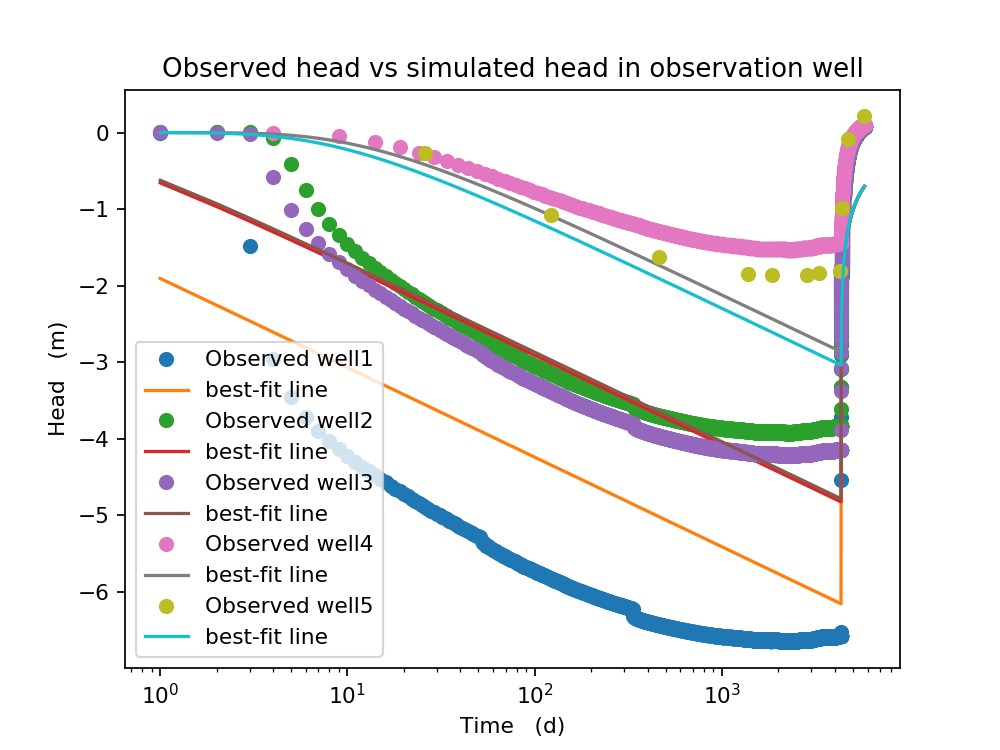

The optimized mean square error is 0.7585
The optimized hydraulic conductivity and specific storage coefficient is 32.8 m/d and 1.9184e-05 /m


In [29]:
plt.figure()
for i in range(5):
    time = data[i][:,0]
    obs = -data[i][:,1]
    ind = np.where(time>0)
    time = time[ind]
    obs = obs[ind]
    plt.semilogx(time, obs,'o',label = 'Observed well'+str(i+1))
    plt.semilogx(data[0][1:,0], model(k_Q2,s_Q2, data[0][1:,0] ,X[i], Y[i])[0], label ='best-fit line')
plt.show()
plt.legend()
plt.xlabel('Time   (d)')
plt.ylabel('Head   (m)')
plt.title('Observed head vs simulated head in observation well')
print("The optimized mean square error is %.4f"%(minimize([k_Q2,s_Q2],data,X,Y)))
print("The optimized hydraulic conductivity and specific storage coefficient is {0:.3} m/d and {1:.5} /m".format(k_Q2, s_Q2))

### Question 3 

**Determine the hydraulic conductivity and specific storage coefficient of the aquifer by using the measurements at all observation wells simutaneously and by including the river, assuming the river is fully contact with the aquifer (no bed resistence). Creat one graph showing the data of each well and the best-fit line of the modeled head. A semi-log plot may be the best. Report the root mean square error. Is the value of the root mean square error smaller than for Question 2?**

Take into account the river

In [7]:
River_data = np.loadtxt("rivereast.txt")

<IPython.core.display.Javascript object>


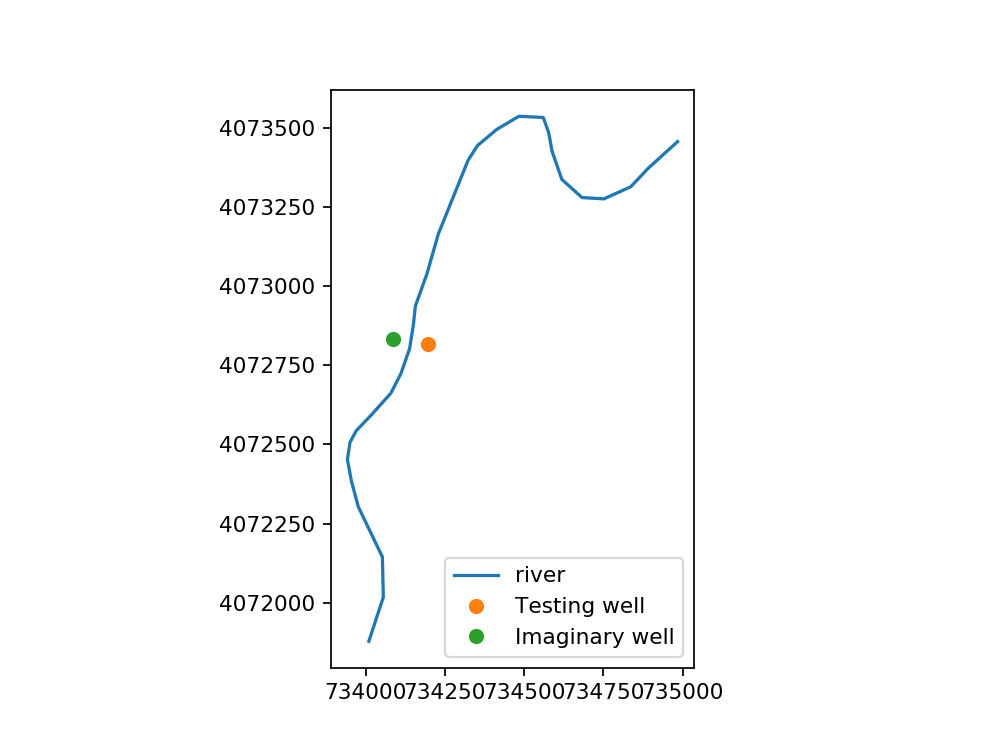

In [8]:
x_river = [i[0] for i in River_data]
y_river = [i[1] for i in River_data]
plt.figure()
plt.plot(x_river, y_river, label='river')
plt.plot(734197.1, 4072815.9, 'o', label='Testing well')
plt.plot(734086.3, 4072833.6, 'o', label = 'Imaginary well')
plt.axis('scaled')
plt.legend()
plt.show()

In [24]:
def model_q3(k, S, t, x, y):
    ml = ModelMaq(kaq= k , z= [91.2, 76.2], Saq = S, tmin=0.0001, tmax = 10)
    wl1 = Well(ml, xw=734197.1, yw = 4072815.9, rw = 0.3, tsandQ=[(0,3145),(4320/60/24,0)])
    #Imaginary well 
    #wl2 = Well(ml, xw=734086.3 , yw=4072833.6 , rw=0.3, tsandQ=[(0,-3145),(4320/60/24,0)])
    ls = HeadLineSinkString(ml, xy = River_data, tsandh=[(0, 0)])
    ml.solve(silent = True)
    return ml.head(x, y, t/60/24)
obj_q3 = lambda P,t,obs,x,y : ((model_q3(P[0],P[1],t, x, y) - obs)**2).sum()


def minimize(P,data,X,Y, silent):
    tot = 0
    length = 0
    for j in range(5):
        time = data[j][:,0]
        obs = -data[j][:,1]
        ind = np.where(time>0)
        time = time[ind]
        obs = obs[ind]
        length += len(obs)
        tot += obj_q3(P, time, obs, X[j] ,Y[j])
        if silent == False:
            print(obj_q3(P, time, obs, X[j] ,Y[j]))
    return np.sqrt(tot/length)

In [10]:
k_q3, s_q3 = fmin(minimize, x0=[10,0.001], args=(data, X, Y, True), xtol=1e-1, ftol=1e-1, maxiter=1e4, disp=False)

In [25]:
print("The optimized mean square error is %.4f"%(minimize([k_q3,s_q3],data,X,Y, False)))
print("The hydraulic conductivity and sepcific storage coefficient for this model are %.2f m/d, %.6f /m respectively"%(k_q3, s_q3))

177.033564078
57.5468108133
166.38716077
242.378693355
10.8043207276
The optimized mean square error is 0.1881
The hydraulic conductivity and sepcific storage coefficient for this model are 12.95 m/d, 0.000123 /m respectively


<IPython.core.display.Javascript object>


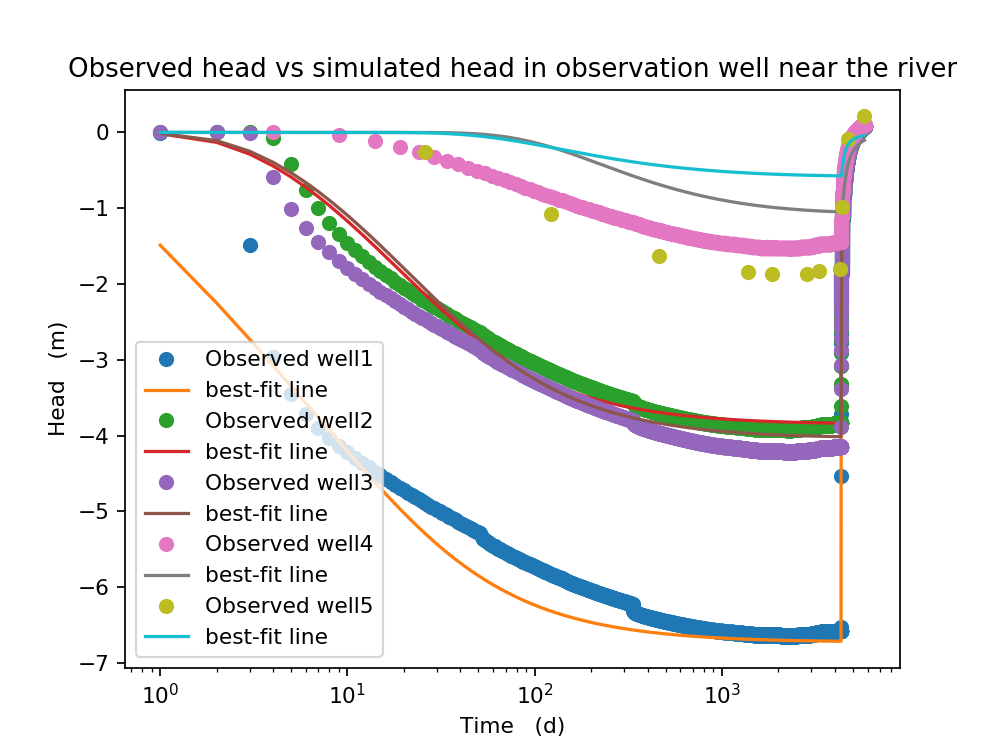

Text(0.5,1,'Observed head vs simulated head in observation well near the river')

In [34]:
plt.figure()
for i in range(5):
    time = data[i][:,0]
    obs = -data[i][:,1]
    ind = np.where(time>0)
    time = time[ind]
    obs = obs[ind]
    plt.semilogx(time, obs,'o',label = 'Observed well'+str(i+1))
    plt.semilogx(data[0][1:,0], model_q3(k_q3,s_q3, data[0][1:,0] ,X[i], Y[i])[0], label ='best-fit line')
plt.legend()
plt.xlabel('Time   (d)')
plt.ylabel('Head   (m)')
plt.title('Observed head vs simulated head in observation well near the river')


** discussion **


The total square error for non-imaginary well and with imaginary well are 666.9 and 649.9 respectively. It indicates that imaginary well does not influence the system solution much.


### Question 4

** Determine the hydraulic conductivity and specific storage coefficient of the aquifer and the bottom resistence of the river by the measurements at all observation wells simultaneously and by including the river, assuming the river has a leaky bed. Create one graph showing the data of each well and the best-fit of the modeled head. A semi-log plot may be the best. Report the root mean square error. Collect your answers for Question 2, 3 and 4 in one large table**

In [13]:
def model_q4(k, S, c, t, x, y):
    ml = ModelMaq(kaq= k , z= [98.5, 91.2, 76.2], c=[c], Saq = S,topboundary='semi', tmin=0.0001, tmax = 10)
    wl1 = Well(ml, xw=734197.1, yw = 4072815.9, rw = 0.3, tsandQ=[(0,3145),(4320/60/24,0)])
    #Imaginary well
    wl2 = Well(ml, xw=734086.3 , yw= 4072833.6 , rw= 0.3, tsandQ=[(0,-3145),(4320/60/24,0)])
    ls = HeadLineSinkString(ml, xy = River_data, tsandh=[(0, 0)])
    ml.solve(silent = True)
    return ml.head(x, y, t/60/24)
obj_q4 = lambda P,t,obs,x,y : ((model_q4(P[0],P[1],P[2],t, x, y) - obs)**2).sum()


def minimize(P,data,X,Y, silent):
    tot = 0
    length = 0
    for j in range(5):
        time = data[j][:,0]
        obs = -data[j][:,1]
        ind = np.where(time>0)
        time = time[ind]
        obs = obs[ind]
        length += len(obs)
        if silent ==False:
            print(obj_q4(P, time, obs, X[j] ,Y[j]))
        tot += obj_q4(P, time, obs, X[j] ,Y[j])
    return np.sqrt(tot/length)

In [14]:
k_q4, s_q4, c_q4 = fmin(minimize, x0=[12,0.0001, 1000], args=(data, X, Y, True), xtol=1e-1, ftol=1e-1, maxiter=1e4, disp=False)

In [26]:
print("The total optimized mean square error is %.4f"%(minimize([k_q4,s_q4,c_q4],data,X,Y, False)))
print("The hydraulic conductivity ,sepcific storage coefficient, and resistence for this model are %.2f m/d, %.6f /m, %.1f day respectively"%(k_q4, s_q4, c_q4))

185.882146712
48.2319174879
155.31582085
249.695696049
10.8393045348
The total optimized mean square error is 0.1875
The hydraulic conductivity ,sepcific storage coefficient, and resistence for this model are 12.91 m/d, 0.000130 /m, 5235552.7 day respectively


<IPython.core.display.Javascript object>


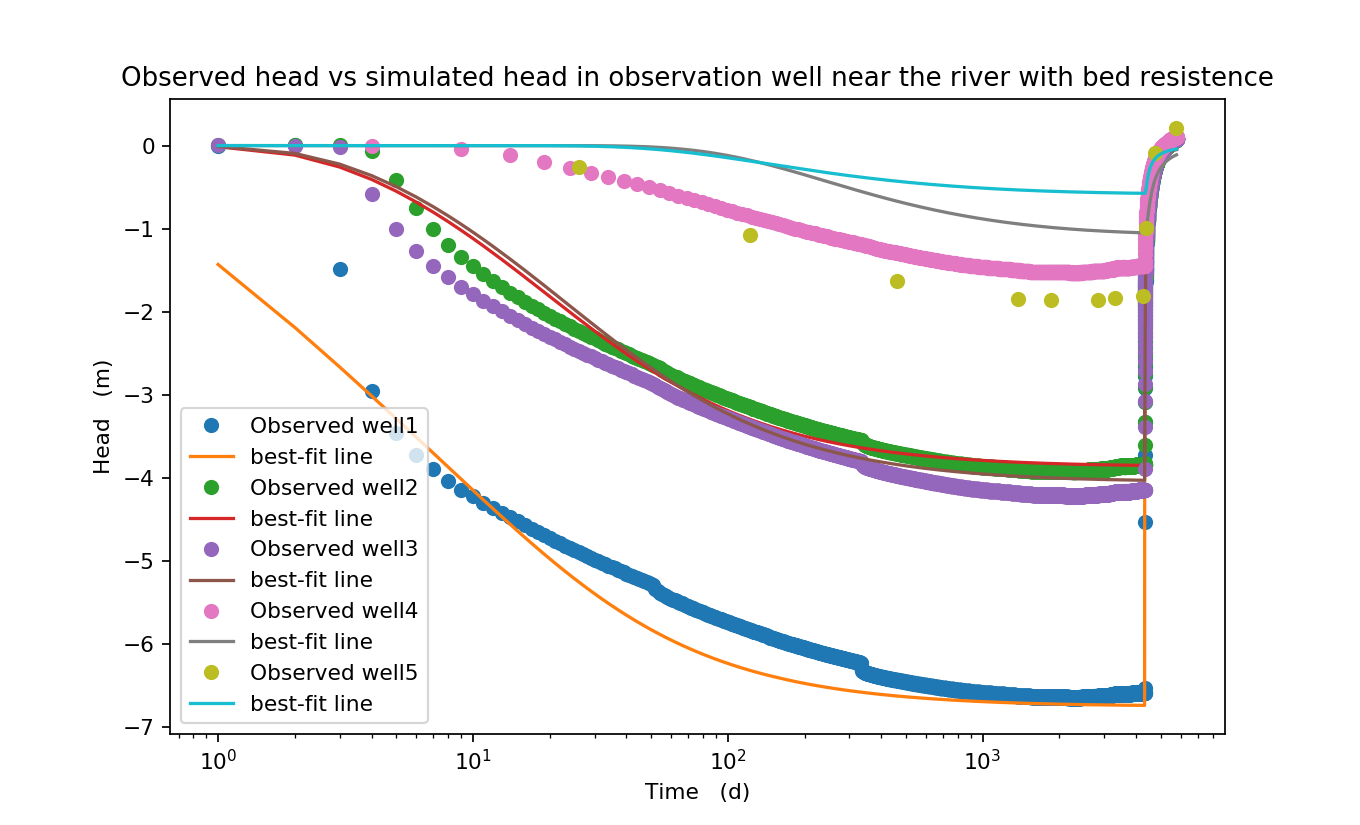

Text(0.5,1,'Observed head vs simulated head in observation well near the river with bed resistence')

In [32]:
plt.figure()
for i in range(5):
    time = data[i][:,0]
    obs = -data[i][:,1]
    ind = np.where(time>0)
    time = time[ind]
    obs = obs[ind]
    plt.semilogx(time, obs,'o',label = 'Observed well'+str(i+1))
    plt.semilogx(data[0][1:,0], model_q4(k_q4,s_q4,c_q4, data[0][1:,0] ,X[i], Y[i])[0], label ='best-fit line')
plt.legend()
plt.xlabel('Time   (d)')
plt.ylabel('Head   (m)')
plt.title('Observed head vs simulated head in observation well near the river with bed resistence')

$$
\begin{array}{|c|c|c|c|}
\hline 
    Question&k(m/d)&Ss(/m)&c(d)&RMSR \\ \hline 
    2&32.8&0.000019&-&0.7585 \\ \hline 
    3&12.95&0.000123&-&0.1881 \\ \hline 
    4&12.91&0.000130&5235552.7&0.1875 \\ \hline 
\end{array}$$

**The root mean square error for Question 2, 3 and 4 are 0.7585, 0.1881 and 0.1875 respectively**

**Discussion**

1. The root mean square error decreases further when interacting river and bed resistence, whereas the bed resistence doesn't give us substantial improvement, which may represent the real situation.

2. The calibrated parameters are more or less within the range when adding river into the system.